<a href="https://colab.research.google.com/github/aryanjuyal/Insurance_EDA/blob/main/insuranceEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About data set


This dataset, named insurance.csv, contains information on individuals from the United States, primarily for the purpose of analyzing and predicting medical insurance charges.


In [145]:
!git clone https://github.com/aryanjuyal/Insurance_EDA.git

Cloning into 'Insurance_EDA'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Adding Csv file

In [ ]:
data=pd.read_csv('insurance.csv')

## Imformation On Dataset

In [ ]:
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## shape of the dataset

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Checking for duplicate values

In [141]:
data.duplicated()
data.duplicated().sum()


np.int64(1)

## checking for null values

In [ ]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


## Pie plot
# this is a pie plot between percentage male and female

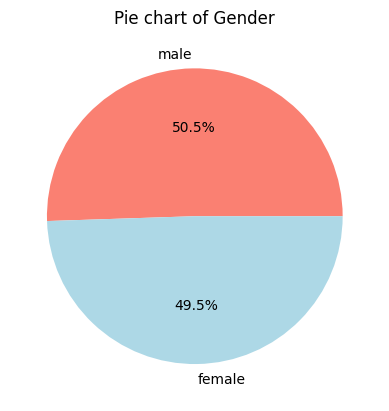

In [ ]:
gender_counts = data['sex'].value_counts()



plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',colors=['salmon', 'lightblue'])

plt.title('Pie chart of Gender')

plt.show()

## Insights
the pie chart shows that there is an comparitively equal number of male and females in the dataset

## Heatmap
this heatmap is used to describe various relationship between numerical parameters of data set. Darker the color more the relationship.
## Insights we get from heatmap
1.Strong relationship between smoker and charges of insurance

2.Age and number of childrens also has a relationship with charges

## How heatmap helps us
in this dataset from heatmap we can limit our charts to only those which have a relationship with charges



/tmp/ipython-input-4270890639.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copy_data['smoker']= copy_data['smoker'].replace({'yes':1,'no':0})
/tmp/ipython-input-4270890639.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copy_data['sex']=copy_data['sex'].replace({'male':1,'female':0})


<Axes: >

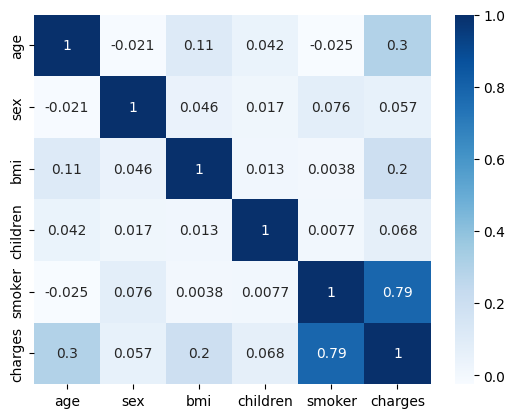

In [ ]:

copy_data=data.copy()

copy_data['smoker']= copy_data['smoker'].replace({'yes':1,'no':0})
copy_data['sex']=copy_data['sex'].replace({'male':1,'female':0})


copy_data.drop('region',axis=1,inplace=True,)
data


relation = copy_data.corr()
sns.heatmap(relation,annot=True,cmap='Blues')

### Count Plot

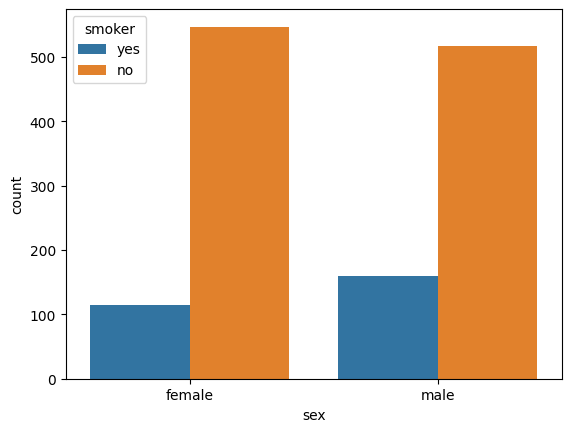

In [109]:
sns.countplot(x='sex', data=data, hue='smoker')

plt.show()


## Insights
1.from the bar plot we get to knowabout the male and female numbers who smoke.
         blue->smokers
         orange->non-smokers
 2.        

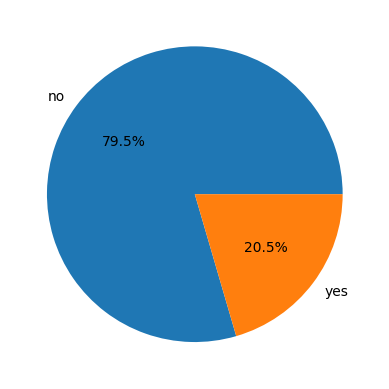

In [ ]:
smoker_count=data['smoker'].value_counts()
plt.pie(smoker_count,labels=smoker_count.index,autopct='%1.1f%%')
plt.show()

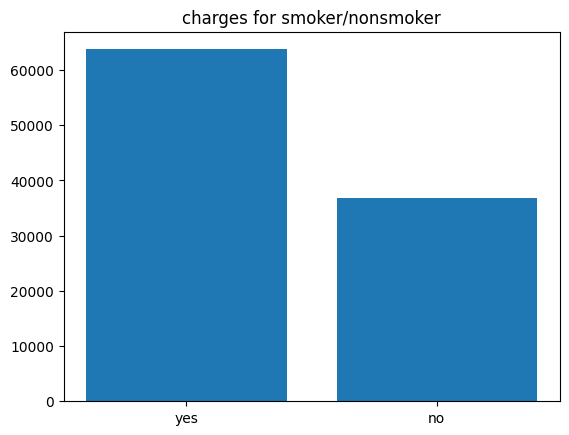

In [96]:
plt.title('charges for smoker/nonsmoker')
plt.bar(data['smoker'],data['charges'])
plt.show()



## Insight
the data shows that the smokers have to pay more then  the non smokers

### Calculations

In [127]:
count=len(data[(data['smoker'] == 'yes') & (data['sex'] == 'male')])
print(count)
count_woman=len(data[(data['smoker'] == 'yes') & (data['sex'] == 'female')])
print(count_woman)
count_woman_total=len(data[data['sex']=='female'])
print(count_woman_total)
count_male_total=len(data[data['sex']=='male'])
print(count_male_total)

male_smoker_percentage=(count/count_male_total)*100
print(male_smoker_percentage)
female_smoker_percentage=(count_woman/count_woman_total)*100
print(female_smoker_percentage)




159
115
662
676
23.5207100591716
17.371601208459214


## Calculations
1.By the calculations we get to know that 23% of females and 17% of males are smokers.

## Count Plot b/w number of childrens and frequency

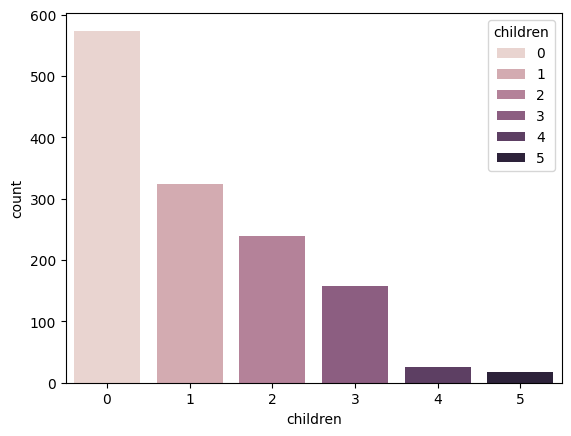

In [129]:
sns.countplot(x='children', data=data, hue='children')

plt.show()

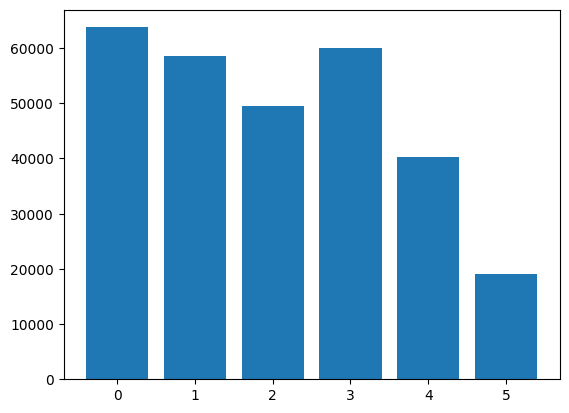

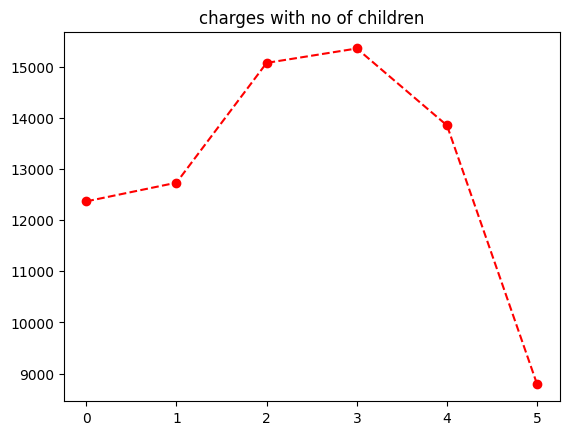

In [139]:


plt.bar(data['children'],data['charges'])
plt.show()
plt.title('charges with no of children')

min_value= data.groupby('children')['charges'].mean()


plt.plot(min_value.index, min_value.values, 'o--', color='r')
plt.show()


## Insights
1.the insights from the count plot is that there is a decline in the  individuals with more  childrens.


2.the small number of theirs could be a factor for a lower average of charges for insurance.

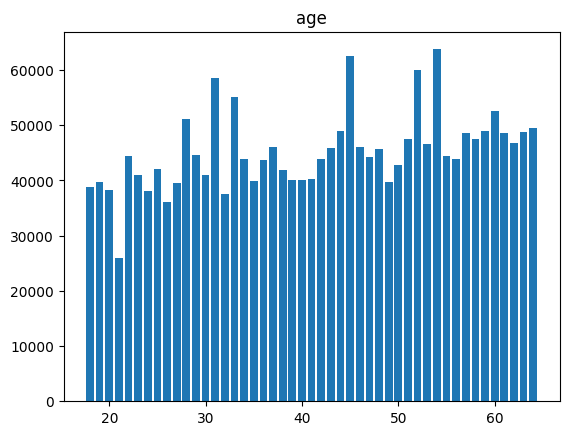

In [144]:
 plt.title('age')

plt.bar(data['age'],data['charges'])
 plt.show()



## Insights
1.age does not influence the charges by a huge margin

### Scatter Plot b/w charges and **bmi**


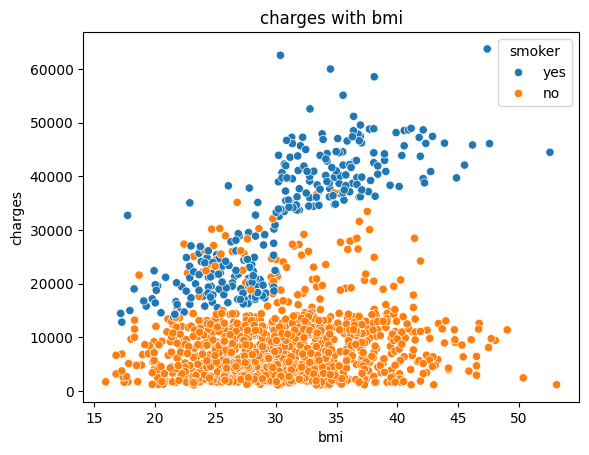

In [103]:
plt.title('charges with bmi')
sns.scatterplot(x='bmi',y='charges',data=data,hue='smoker')
plt.show()





## Insights
the scatter plot shows that high bmi individuals also have similar charges to lower bmi individuals the outliers in the plot are mostly those who are smokers
or individuals with different condtions ex(more childrens,sex,age)

## Scatter Plot between male and females charges in accordance to them being smoker or not

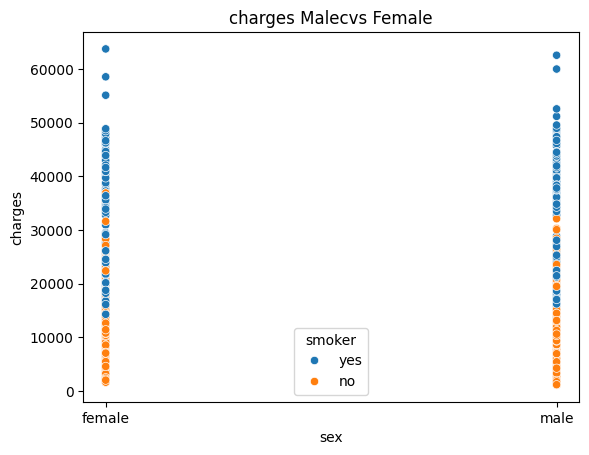

In [105]:
plt.title('charges Malecvs Female')
sns.scatterplot(x='sex',y='charges',data=data,hue='smoker')
plt.show()

## Insight
1.if u are a male and a smoker insurance charges for u could be higher then a female smoker

